In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.io import loadmat
import matplotlib.image as mpimg

In [3]:
data=loadmat('ex4data1.mat')
theta_trained=loadmat('ex4weights.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
theta_trained.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [5]:
Theta1=theta_trained['Theta1']
Theta2=theta_trained['Theta2']

In [6]:
x=data['X']
y=data['y']

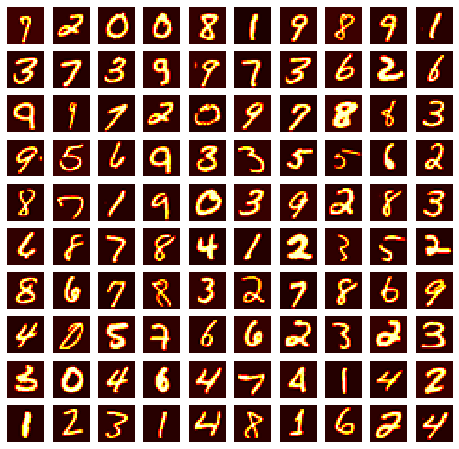

In [7]:
fig,axe=plt.subplots(10,10,figsize=(8,8))
for i in range(10):
    for j in range(10):
        axe[i,j].imshow(x[np.random.randint(0,5001),:].reshape(20,20,order='F'),cmap='hot')
        axe[i,j].axis('off')

In [8]:
ymain=y[:,0]
ymain[ymain==10]=0
ymain

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [9]:
x.shape

(5000, 400)

In [10]:
Theta1.shape

(25, 401)

In [11]:
Theta2.shape

(10, 26)

In [12]:
ymain.shape

(5000,)

In [13]:
nn_params=np.hstack([Theta1.flatten(),Theta2.flatten()])
nn_params.shape

(10285,)

In [14]:
def sigmoid(z):
    ans=1/(1+np.exp(-z))
    return ans
def sigmoidgradient(z):
    ans=sigmoid(z)*(1-sigmoid(z))
    return ans

In [15]:
def nnCostFunction(nn_params,input_layer_size,hidden_layer_size,num_labels,x,y,lamda):
    theta1=nn_params[0:(hidden_layer_size*(input_layer_size+1))].reshape(hidden_layer_size,input_layer_size+1)
    theta2=nn_params[(hidden_layer_size*(input_layer_size+1)):].reshape(num_labels,hidden_layer_size+1)
    m=x.shape[0]
    J=0
    a1=np.hstack([np.ones((m,1)),x])  #input layer activation,5000*401
    z2=np.dot(a1,theta1.T)   #5000*401,401*25=5000*25
    a2=sigmoid(z2)      #5000*25
    a2=np.hstack([np.ones((m,1)),a2])  #5000*26
    z3=np.dot(a2,theta2.T)        #5000*26,26*10=5000*10
    a3=sigmoid(z3)      #5000*10,final output
    y_matrix=y.reshape(-1)  #conversion from vector to horizontal 1D array
    y_matrix=np.eye(num_labels)[y_matrix]  #our answer vector for all training examples,5000*10
    temp1=theta1
    temp2=theta2
    reg_term=(lamda/(2*m))*(np.sum((temp1[:,1:]**2))+np.sum((temp2[:,1:]**2)))   #exclude theta0s
    J=np.sum((y_matrix*np.log(a3))+((1-y_matrix)*np.log(1-a3)))
    J=-J/m
    J=J+reg_term
    
    #backpropagation
    delta_3=a3-y_matrix
    delta_2=np.dot(delta_3,theta2[:,1:])*sigmoidgradient(z2)
    Delta1=np.dot(delta_2.T,a1)
    Delta2=np.dot(delta_3.T,a2)
    theta1_grad=(1/m)*Delta1
    theta1_grad[:,1:]=theta1_grad[:,1:]+(lamda/m)*theta1[:,1:]
    theta2_grad=(1/m)*Delta2
    theta2_grad[:,1:]=theta2_grad[:,1:]+(lamda/m)*theta2[:,1:]
    grad=np.hstack([theta1_grad.ravel(),theta2_grad.ravel()])
    
    return J,grad

In [16]:
nnCostFunction(nn_params,400,25,10,x,y,1)

(10.537600366707585,
 array([ 2.79735891e-02, -2.11248326e-12,  4.38829369e-13, ...,
         5.47270560e-03,  5.20766639e-02,  9.96564573e-04]))

In [17]:
def randInitializeWeights(L_in,L_out,init_epsilon=0.12):   #L_in=no of units in input layer
    w=np.random.rand(L_out,L_in+1)*2*init_epsilon-init_epsilon
    return w
input_layer_size=400
hidden_layer_size=25
num_labels=10

In [18]:
initial_theta1=randInitializeWeights(input_layer_size,hidden_layer_size)
initial_theta2=randInitializeWeights(hidden_layer_size,num_labels)
initial_nnparams=np.hstack([initial_theta1.ravel(),initial_theta2.ravel()])

In [19]:
options={'maxiter':100}
lmda=1
costFunction=lambda p:nnCostFunction(p,input_layer_size,hidden_layer_size,num_labels,x,y,lmda)
res=optimize.minimize(costFunction,initial_nnparams,jac=True,method='TNC',options=options)

In [20]:
nnn_params = res.x
        
# Obtain Theta1 and Theta2 back from nn_params
heta1 = np.reshape(nnn_params[:hidden_layer_size * (input_layer_size + 1)],(hidden_layer_size, (input_layer_size + 1)))

heta2 = np.reshape(nnn_params[(hidden_layer_size * (input_layer_size + 1)):],(num_labels, (hidden_layer_size + 1)))

In [21]:
heta1.shape

(25, 401)

In [22]:
def predict(theta1,theta2,x):
    m=x.shape[0]
    num_labels=theta2.shape[0]
    xtmp=np.hstack([np.ones((m,1)),x])
    z1=np.dot(xtmp,theta1.T)   #5000*25
    a1=sigmoid(z1)
    a1=np.hstack([np.ones((m,1)),a1])     #forward propagation implementation
    z2=np.dot(a1,theta2.T)
    a2=sigmoid(z2)
    p=np.argmax(a2,axis=1)
    return p

In [23]:
prediction=predict(heta1,heta2,x)     #due to octave indexing style
prediction.shape

(5000,)

In [24]:
prediction[ymain==prediction].shape

(4790,)

In [25]:
4852/5000   #accuracy

0.9704

In [27]:
vis=heta1[:,1:]
vis.shape

(25, 400)

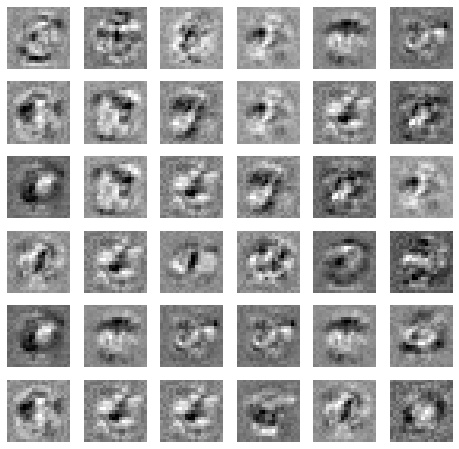

In [33]:
fig,axe=plt.subplots(6,6,figsize=(8,8))
for i in range(6):
    for j in range(6):
        axe[i,j].imshow(heta1[np.random.randint(0,25),1:].reshape(20,20,order='F'),cmap='gray')
        axe[i,j].axis('off')